# [Hypothesis] Development in tourism caused lot of crimes.

Following types of crimes are identified as high correlation with tourism in our initial analysis.

1. Robbery
2. Offences under dangeroud drugs
3. Theft
4. Kidnapping
5. Offences with weapons

**Imports and workspace setting**

In [238]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [239]:
integrated_data = pd.read_csv('../data/integrated_data.csv')
print("Data set size : ", integrated_data.shape)
integrated_data = integrated_data.drop(integrated_data.columns[[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]], axis=1)
integrated_data.head()

Data set size :  (26, 38)


,District,Rooms,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,...,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs",2012
0,Ampara,610.0,29.0,31.0,36.0,239.0,69.0,38.0,16.0,12.0,...,232.0,242.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,648.06
1,Anuradhapura,979.0,68.0,47.0,107.0,834.0,108.0,72.0,24.0,15.0,...,270.0,584.0,6.0,0.0,23.0,2.0,4.0,1.0,7.0,856.23
2,Badulla,765.0,38.0,14.0,42.0,359.0,112.0,85.0,28.0,11.0,...,138.0,296.0,1.0,0.0,2.0,0.0,3.0,0.0,20.0,811.76
3,Batticaloa,883.0,21.0,33.0,38.0,227.0,56.0,89.0,11.0,2.0,...,225.0,221.0,1.0,0.0,6.0,3.0,1.0,1.0,3.0,525.14
4,Colombo,7519.0,154.0,22.0,140.0,2996.0,248.0,379.0,62.0,21.0,...,1736.0,2809.0,4.0,0.0,52.0,1.0,21.0,6.0,573.0,2309.81


####  Normalizing the crime data per district by dividing by district population

In [240]:
integrated_dataNormalized = integrated_data

for label,content in integrated_data.loc[:, "Abduction / Kidnapping":"Offence under Poisons, Opium & Dangerous Drugs"].iteritems():
    integrated_dataNormalized[label] = integrated_data[label].divide(integrated_data["2012"])
    
integrated_dataNormalized.head()

,District,Rooms,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,...,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs",2012
0,Ampara,610.0,0.044749,0.047835,0.055550,0.368793,0.106472,0.058637,0.024689,0.018517,...,0.357992,0.373422,0.001543,0.0,0.001543,0.003086,0.001543,0.000000,0.001543,648.06
1,Anuradhapura,979.0,0.079418,0.054892,0.124966,0.974037,0.126134,0.084090,0.028030,0.017519,...,0.315336,0.682060,0.007007,0.0,0.026862,0.002336,0.004672,0.001168,0.008175,856.23
2,Badulla,765.0,0.046812,0.017246,0.051739,0.442249,0.137972,0.104711,0.034493,0.013551,...,0.170001,0.364640,0.001232,0.0,0.002464,0.000000,0.003696,0.000000,0.024638,811.76
3,Batticaloa,883.0,0.039989,0.062840,0.072362,0.432266,0.106638,0.169479,0.020947,0.003809,...,0.428457,0.420840,0.001904,0.0,0.011426,0.005713,0.001904,0.001904,0.005713,525.14
4,Colombo,7519.0,0.066672,0.009525,0.060611,1.297076,0.107368,0.164083,0.026842,0.009092,...,0.751577,1.216117,0.001732,0.0,0.022513,0.000433,0.009092,0.002598,0.248072,2309.81


#### Calculating pearson's correlation coefficient between variables

Index(['Rooms', 'Robbery', 'Offence under Poisons, Opium & Dangerous Drugs',
       '2012'],
      dtype='object')


Text(0.5, 1.0, "Room count vs Pearson's Correlation")

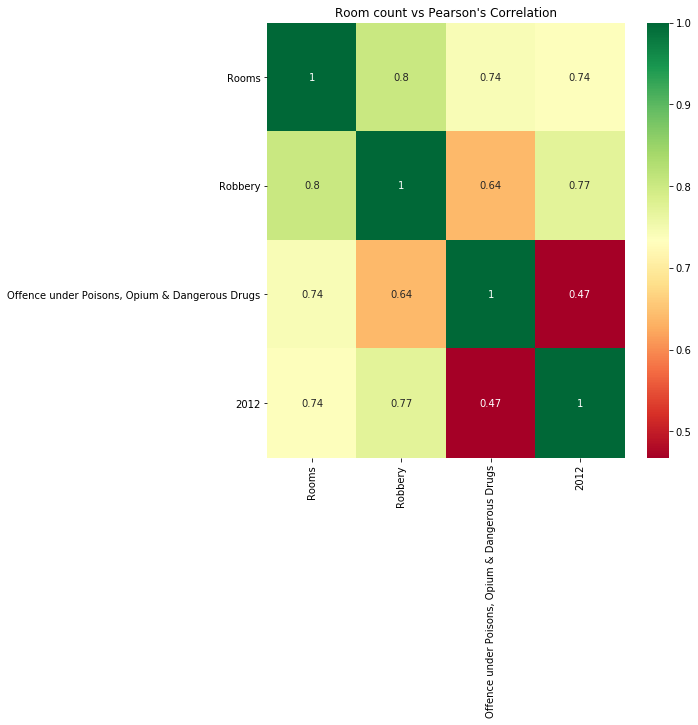

In [241]:
pearsonsCorrelations = integrated_dataNormalized.corr(method="pearson")

## Extract high correlations to Rooms
topCorrFeatures = pearsonsCorrelations.index[abs(pearsonsCorrelations['Rooms']) >= 0.6]
print(topCorrFeatures)

plt.figure(figsize=(8,8))
ax = sns.heatmap(integrated_dataNormalized[topCorrFeatures].corr(method="pearson"), annot=True, cmap="RdYlGn")
ax.set_title('Room count vs Pearson\'s Correlation')

#### Calculating sperman's correlation coefficient between variables

Text(0.5, 1.0, "Room count vs Spearman's Correlation")

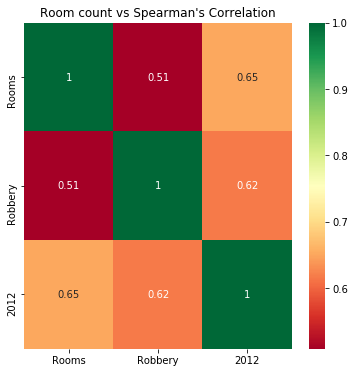

In [242]:
spearmanCorrelations = integrated_dataNormalized.corr(method='spearman')

## Extract high correlations to Rooms
topCorrFeatures = spearmanCorrelations.index[abs(spearmanCorrelations['Rooms']) >= 0.5]

plt.figure(figsize=(6,6))
ax = sns.heatmap(integrated_dataNormalized[topCorrFeatures].corr(method='spearman'), annot=True, cmap="RdYlGn")
ax.set_title('Room count vs Spearman\'s Correlation')

According to above results there is a high correlation between the number of Rooms and crimes of catagory "Offence under Poisons, Opium & Dangerous Drugs" and "Robbery" of each district. Let's calculate the statistical significance of above results

**Visualizing relation between tourism and crimes mentioned**

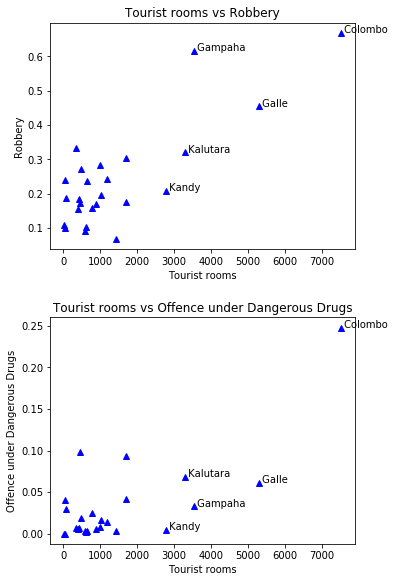

In [243]:
def plotScatterForCrime (column, tag, subPlotIndex):
    plt.subplot(3,2,subPlotIndex)
    plt.plot(integrated_data['Rooms'],  integrated_data[column], 'b^')
    plt.title('Tourist rooms vs ' + tag)
    plt.xlabel("Tourist rooms")
    plt.ylabel(tag)

    for i, txt in enumerate(integrated_data['District']):
        if integrated_data['Rooms'][i] >= 2000:
            plt.annotate(' ' + txt, (integrated_data['Rooms'][i], integrated_data[column][i]))

plt.figure(figsize=(12, 15))
plt.subplots_adjust(hspace=0.3)

plotScatterForCrime('Robbery', "Robbery", 1)
#plotScatterForCrime('Abduction / Kidnapping', "Abduction / Kidnapping", 2)
plotScatterForCrime('Offence under Poisons, Opium & Dangerous Drugs', "Offence under Dangerous Drugs", 3)
# plotScatterForCrime('H.B. & Theft', "H.B. & Theft", 4)
# plotScatterForCrime('Offences under the Offensive weapons Act.', "Offences under the Offensive weapons Act.", 5)

#### Testing for normality

In [244]:
## Prove normallity
value, p = stat.normaltest(integrated_dataNormalized['Rooms'], nan_policy='omit')

print(value, p)
if p >= 0.05:
    print('It is likely that number of rooms are normally distributed.')
else:
    print('It is unlikely that number of rooms are normally distributed.', p, value)

22.90857212478845 1.0603927968791886e-05
It is unlikely that number of rooms are normally distributed. 1.0603927968791886e-05 22.90857212478845


In [245]:
value, p = stat.normaltest(integrated_dataNormalized['Robbery'], nan_policy='omit')

print(value, p)
if p >= 0.05:
    print('It is likely that number of Robberies are normally distributed.')
else:
    print('It is unlikely that number of Robberies are normally distributed.', p, value)

14.576684990320576 0.0006834599526116946
It is unlikely that number of Robberies are normally distributed. 0.0006834599526116946 14.576684990320576


In [246]:
alue, p = stat.normaltest(integrated_dataNormalized['Offence under Poisons, Opium & Dangerous Drugs'], nan_policy='omit')

print(value, p)
if p >= 0.05:
    print('It is likely that number of "Offence under Poisons, Opium & Dangerous Drugs" are normally distributed.')
else:
    print('It is unlikely that number of "Offence under Poisons, Opium & Dangerous Drugs" are normally distributed.', p, value)

14.576684990320576 4.441616644581294e-09
It is unlikely that number of "Offence under Poisons, Opium & Dangerous Drugs" are normally distributed. 4.441616644581294e-09 14.576684990320576


### Hypothesis testing


Hypothesis 1-

    H0: Number of tourist Rooms and Crimes under Robberies are Uncorrelated
    H1: Number of tourist Rooms and Crimes under Robberies are Correlated


Hypothesis 2-

    H0: Number of tourist Rooms and Crimes under "Offence under Poisons, Opium & Dangerous Drugs" are Uncorrelated
    H1: Number of tourist Rooms and Crimes under "Offence under Poisons, Opium & Dangerous Drugs" are Correlated

#### Testing Statistical significance for above hypothesis


0.5084615384615385 0.009450280771159697
Number of tourist Rooms and Crimes under Robberies are Correlated


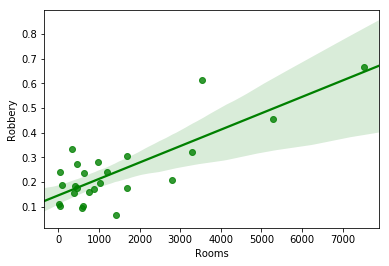

In [247]:
from scipy import stats

val, p = stats.spearmanr(integrated_dataNormalized["Rooms"], integrated_dataNormalized["Robbery"], nan_policy ='omit')

alpha = 0.05

print(val, p)
if p > alpha:
    print('Number of tourist Rooms and Crimes under Robberies are Uncorrelated')
else:
    print('Number of tourist Rooms and Crimes under Robberies are Correlated')
    ax = sns.regplot(x="Rooms", y="Robbery", data=integrated_dataNormalized, color="g")

0.4608578658053049 0.020420082997439096
Number of tourist Rooms and crimes of "Offence under Poisons, Opium & Dangerous Drugs" are Correlated


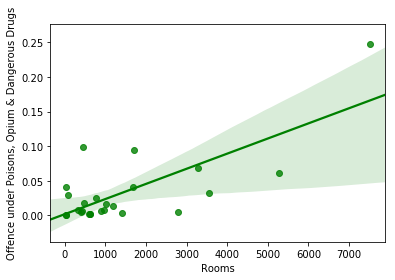

In [248]:
from scipy import stats

val, p = stats.spearmanr(integrated_dataNormalized["Rooms"], integrated_dataNormalized["Offence under Poisons, Opium & Dangerous Drugs"], nan_policy ='omit')

alpha = 0.05

print(val, p)
if p > alpha:
    print('Number of tourist Rooms and crimes of "Offence under Poisons, Opium & Dangerous Drugs" are Uncorrelated')
else:
    print('Number of tourist Rooms and crimes of "Offence under Poisons, Opium & Dangerous Drugs" are Correlated')
    ax = sns.regplot(x="Rooms", y="Offence under Poisons, Opium & Dangerous Drugs", data=integrated_dataNormalized, color="g")